In [1]:
import numpy as np
from naf.linalg import tdqsv
from naf.incf import csisv, cubic_spline_coeff_matrix, c_h, cubic_spline_vector, solve_s_vector, cubic_spline_poly_coeffs
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

np.set_printoptions(precision=3, suppress=True)

In [2]:
pts = np.array([[0.0, 0.302],
                [0.2, 0.185],
                [0.3, 0.106],
                [0.4, 0.093],
                [0.5, 0.240],
                [0.6, 0.579],
                [0.7, 0.561],
                [0.8, 0.468],
                [1.0, 0.302]])

In [3]:
t1 = np.linspace(0,0.2,num=5)
t2 = np.linspace(0.25,0.8,num=12)
t3 = np.linspace(0.85,1.0,num=4)
t = np.concatenate((t1, t2, t3))
print(t)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [4]:
iy1 = csisv(t, pts, 1)
iy2 = csisv(t, pts, 2, -0.585, -0.830)
iy3 = csisv(t, pts, 3)
iy4 = csisv(t, pts, 4)
intp = np.column_stack((t,iy1, iy2, iy3, iy4))
print(tabulate(intp, floatfmt=".3f"))

-----  -----  -----  -----  -----
0.000  0.302  0.302  0.302  0.302
0.050  0.278  0.275  0.282  0.297
0.100  0.252  0.249  0.256  0.271
0.150  0.222  0.220  0.224  0.231
0.200  0.185  0.185  0.185  0.185
0.250  0.143  0.143  0.142  0.141
0.300  0.106  0.106  0.106  0.106
0.350  0.087  0.087  0.088  0.088
0.400  0.093  0.093  0.093  0.093
0.450  0.133  0.133  0.133  0.133
0.500  0.240  0.240  0.240  0.240
0.550  0.424  0.424  0.424  0.424
0.600  0.579  0.579  0.579  0.579
0.650  0.608  0.608  0.608  0.608
0.700  0.561  0.561  0.561  0.561
0.750  0.511  0.511  0.511  0.511
0.800  0.468  0.468  0.468  0.468
0.850  0.426  0.426  0.426  0.430
0.900  0.385  0.385  0.384  0.392
0.950  0.343  0.343  0.343  0.350
1.000  0.302  0.302  0.302  0.302
-----  -----  -----  -----  -----


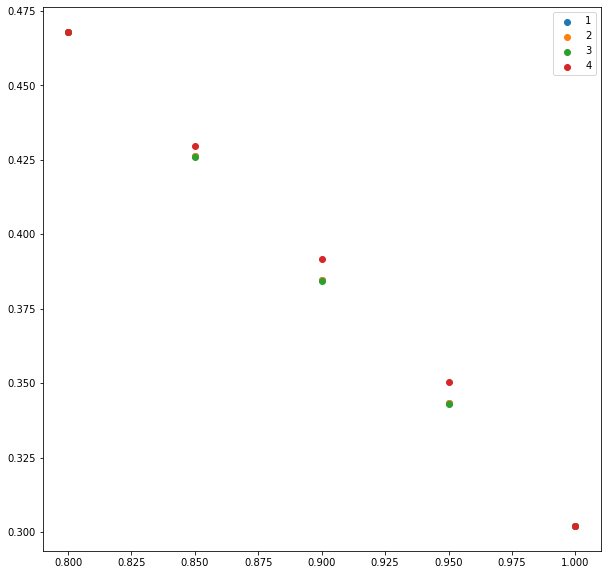

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
i = 16
j = 21
ax.scatter(t[i:j], iy1[i:j], label="1")
ax.scatter(t[i:j], iy2[i:j], label="2")
ax.scatter(t[i:j], iy3[i:j], label="3")
ax.scatter(t[i:j], iy4[i:j], label="4")
ax.legend()
plt.show()

In [6]:
x = pts[...,0]
h = c_h(x)
print(h)

[0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.2]


In [7]:
csm1 = cubic_spline_coeff_matrix(x, h, 1)
print(csm1)
b1 = cubic_spline_vector(pts, h, 1)
print(b1)

[[0.  0.6 0.1]
 [0.1 0.4 0.1]
 [0.1 0.4 0.1]
 [0.1 0.4 0.1]
 [0.1 0.4 0.1]
 [0.1 0.4 0.1]
 [0.1 0.6 0. ]]
[ -1.23   3.96   9.6   11.52 -21.42  -4.5    0.6 ]


In [8]:
csm2 = cubic_spline_coeff_matrix(x, h, 2)
print(csm2)
b2 = cubic_spline_vector(pts, h, 2, -0.585, -0.830)
print(b2)

[[0.  0.4 0.2]
 [0.2 0.6 0.1]
 [0.1 0.4 0.1]
 [0.1 0.4 0.1]
 [0.1 0.4 0.1]
 [0.1 0.4 0.1]
 [0.1 0.4 0.1]
 [0.1 0.6 0.2]
 [0.2 0.4 0. ]]
[  0.    -1.23   3.96   9.6   11.52 -21.42  -4.5    0.6   -0.  ]


In [9]:
csm3 = cubic_spline_coeff_matrix(x, h, 3)
print(csm3)
b3 = cubic_spline_vector(pts, h, 3)
print(b3)

[[0.  0.8 0.1]
 [0.1 0.4 0.1]
 [0.1 0.4 0.1]
 [0.1 0.4 0.1]
 [0.1 0.4 0.1]
 [0.1 0.4 0.1]
 [0.1 0.8 0. ]]
[ -1.23   3.96   9.6   11.52 -21.42  -4.5    0.6 ]


In [10]:
csm4 = cubic_spline_coeff_matrix(x, h, 4)
print(csm4)
b4 = cubic_spline_vector(pts, h, 4)
print(b4)
s4 = solve_s_vector(csm4, h, b4, 4)
print(s4)
csc4 = cubic_spline_poly_coeffs(s4, pts[...,1], h)
print(csc4)

[[ 0.   1.2 -0.3]
 [ 0.1  0.4  0.1]
 [ 0.1  0.4  0.1]
 [ 0.1  0.4  0.1]
 [ 0.1  0.4  0.1]
 [ 0.1  0.4  0.1]
 [-0.3  1.2  0. ]]
[ -1.23   3.96   9.6   11.52 -21.42  -4.5    0.6 ]
[-11.565   0.673   6.792  11.758  42.174 -65.256   4.648   1.662  -4.31 ]
[[  10.199   10.199    8.277   50.693 -179.05   116.507   -4.977   -4.977]
 [  -5.783    0.337    3.396    5.879   21.087  -32.628    2.324    0.831]
 [   0.164   -0.926   -0.552    0.375    3.072    1.918   -1.113   -0.797]
 [   0.302    0.185    0.106    0.093    0.24     0.579    0.561    0.468]]
